In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
data_root = r"C:/Users/Tony\Documents/github_remotes/FlowMOP/figs_data/fig_3_data/fig_3_rawdata"

In [3]:
data = pd.read_excel(data_root + "/rejection_analysis.xlsx")

In [4]:
time = data[data['Analysis Type'] == 'Time'].drop(columns=['Analysis Type', 'Dataset']).replace({'Y': int(1), 'N': int(0)})
debris = data[data['Analysis Type'] == 'Debris'].drop(columns=['Analysis Type', 'Dataset']).replace({'Y': int(1), 'N': int(0)})
doublets = data[data['Analysis Type'] == 'Doublets'].drop(columns=['Analysis Type', 'Dataset']).replace({'Y': int(1), 'N': int(0)})

C:\Users\Tony\AppData\Local\Temp\ipykernel_38568\151061215.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  time = data[data['Analysis Type'] == 'Time'].drop(columns=['Analysis Type', 'Dataset']).replace({'Y': int(1), 'N': int(0)})
C:\Users\Tony\AppData\Local\Temp\ipykernel_38568\151061215.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  debris = data[data['Analysis Type'] == 'Debris'].drop(columns=['Analysis Type', 'Dataset']).replace({'Y': int(1), 'N': int(0)})
C:\Users\Tony\AppData\Local\Temp\ipykernel_38568\151061215.py:

In [5]:
import sys

if 'chi_squared_analysis' in sys.modules.keys():
    del sys.modules['chi_squared_analysis']
import chi_squared_analysis


In [6]:
time_results = chi_squared_analysis.analyze_benchmarker_performance(time, 5, control_methods = [1,2,3,4], novel_methods = [6,7])
debris_results = chi_squared_analysis.analyze_benchmarker_performance(debris, 5, control_methods = [1,2,3,4])
doublets_results = chi_squared_analysis.analyze_benchmarker_performance(doublets, 5, control_methods = [1,2,3,4])

CHI-SQUARED ANALYSIS: All Data
Total samples: 37
Multiple comparison adjustment: two_stage_fdr

1. OVERALL COMPARISON (Chi-squared test)
--------------------------------------------------
Chi-squared statistic: 32.4190
P-value: 0.000014
Degrees of freedom: 6
✓ Significant differences exist between methods (p < 0.05)

Pass Rates by Benchmarker:
Benchmarker     Pass Rate    Passes/Total   
---------------------------------------------
Expert 1 (C)     81.1%      30/37
Expert 2 (C)     89.2%      33/37
Expert 3 (C)     97.3%      36/37
Expert 4 (C)    100.0%      37/37
FlowCut (N)      62.2%      23/37
PeacoQC (N)      70.3%      26/37
FlowMOP (Y)      67.6%      25/37

2. NON-INFERIORITY TEST (Your Method vs Controls)
--------------------------------------------------
Control methods mean pass rate: 91.9%
Control methods SD: 8.5%
Non-inferiority threshold (mean - 1SD): 83.3%
Your method pass rate: 67.6%

✗ Your method is INFERIOR to controls
  (Pass rate 67.6% < threshold 83.3%)

3. PAIR

# Plotting

In [7]:
from chi_squared_analysis import plot_pass_rates

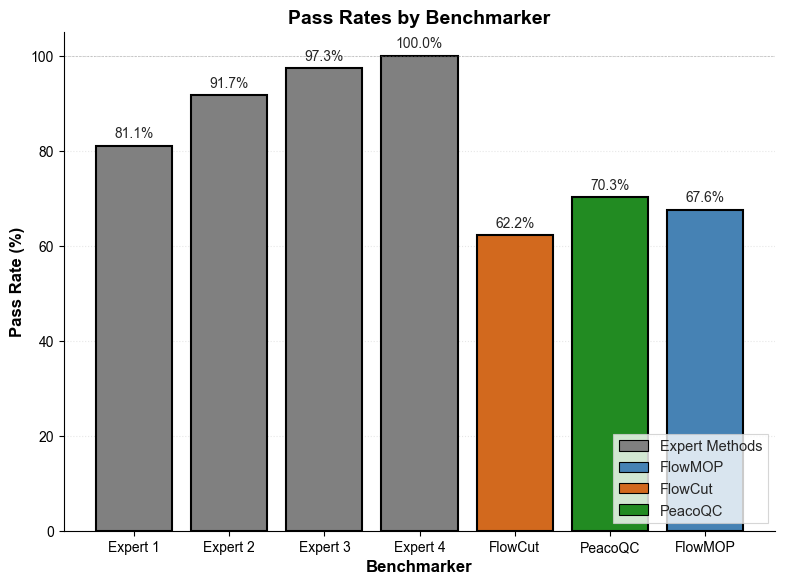

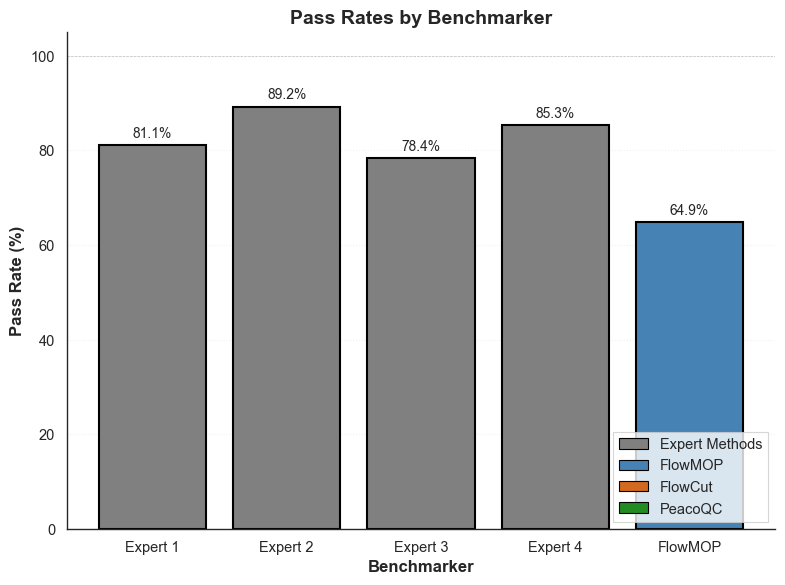

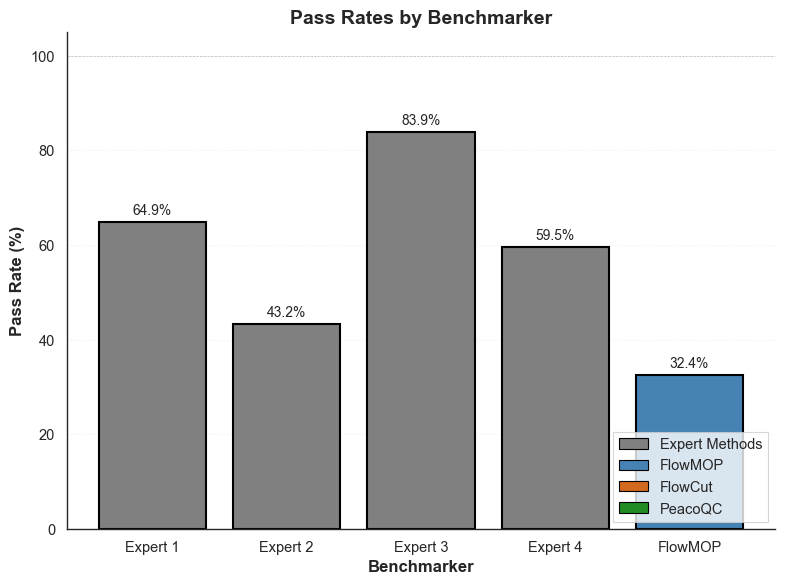

In [8]:
time_plot = plot_pass_rates(time, your_method = 5, control_methods = [1,2,3,4], novel_methods = [6,7])
debris_plot = plot_pass_rates(debris, your_method = 5, control_methods = [1,2,3,4])
doublets_plot = plot_pass_rates(doublets, your_method = 5, control_methods = [1,2,3,4])